### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
* y_score : Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers)

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_y_df = pd.read_csv('./datasets/titanic_gender_submission.csv')

In [3]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [18]:
train = train.dropna(axis=0)

encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex'] = data

scaler = MinMaxScaler()
data = scaler.fit_transform(train[['Age']])
train['Age'] = data

X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)

lr.fit(X, y)
dt.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [5]:
test = test.fillna(np.mean(test['Age']))

encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex'] = data

scaler = MinMaxScaler()
data = scaler.fit_transform(test[['Age']])
test['Age'] = data

In [20]:
pred = lr.predict(test)

pred_proba = lr.predict_proba(test)

dt_pred_proba = dt.predict_proba(test)

In [10]:
from sklearn.metrics import roc_curve

In [22]:
fpr, tpr, threshold = roc_curve(test_y, pred_proba[:,1])
dt_fpr, dt_tpr, dt_threshold = roc_curve(test_y, dt_pred_proba[:,1])

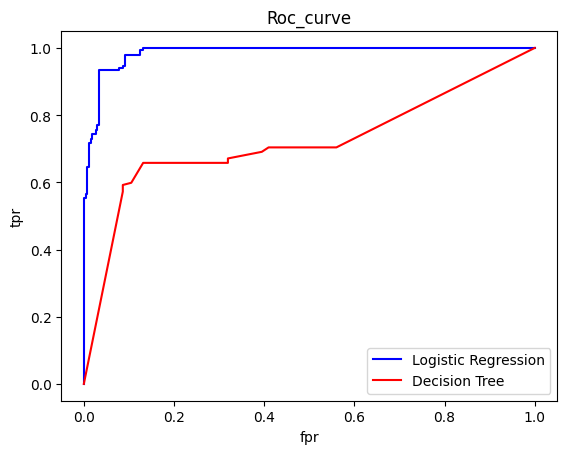

In [23]:
import matplotlib.pyplot as plt

plt.title("Roc_curve")

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot(fpr, tpr, "b", label = "Logistic Regression")
plt.plot(dt_fpr, dt_tpr, "r", label = "Decision Tree")
plt.legend(loc = "lower right")
plt.show()

### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [24]:
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(test_y, pred_proba[:,1])
df_auc = roc_auc_score(test_y, dt_pred_proba[:,1])

In [26]:
print(f'regression auc : {lr_auc} & decisiontree auc : {df_auc}')

regression auc : 0.9852344677483182 & decisiontree auc : 0.7184161060546101
